In [5]:
!pip install requests matplotlib

City: Hoboken
Temperature: 16.52°C
Humidity: 53%
Wind Speed: 5.81 m/s
Weather Description: clear sky
Sunrise: 2024-10-11 11:03:20
Sunset: 2024-10-11 22:21:49

5-Day Forecast:
2024-10-12 06:00:00 | Temp: 16.17°C
2024-10-13 06:00:00 | Temp: 15.3°C
2024-10-14 06:00:00 | Temp: 19.24°C
2024-10-15 06:00:00 | Temp: 7.41°C
2024-10-16 06:00:00 | Temp: 7.36°C


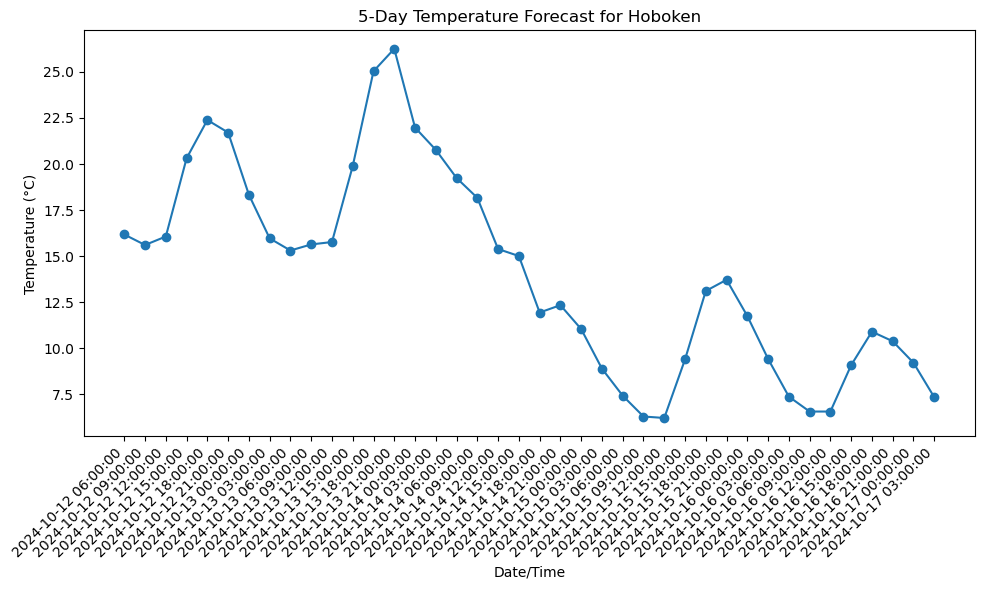

In [6]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime, timezone

# Your new API key
API_KEY = 'cf90980099690dd02e59cdaed7434965'
BASE_URL = "http://api.openweathermap.org/data/2.5/"

def get_weather(city="Hoboken"):
    """Fetch current weather and 5-day forecast for a specific city."""
    # Build the API URL for current weather
    weather_url = BASE_URL + "weather?appid=" + API_KEY + "&q=" + city + "&units=metric"
    forecast_url = BASE_URL + "forecast?appid=" + API_KEY + "&q=" + city + "&units=metric"

    weather_response = requests.get(weather_url)
    forecast_response = requests.get(forecast_url)

    if weather_response.status_code == 200 and forecast_response.status_code == 200:
        # Parse JSON response for current weather
        weather_data = weather_response.json()
        main = weather_data['main']
        wind = weather_data['wind']
        weather_desc = weather_data['weather'][0]['description']
        sunrise = datetime.fromtimestamp(weather_data['sys']['sunrise'], tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S')
        sunset = datetime.fromtimestamp(weather_data['sys']['sunset'], tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S')

        # Display current weather
        print(f"City: {city}")
        print(f"Temperature: {main['temp']}°C")
        print(f"Humidity: {main['humidity']}%")
        print(f"Wind Speed: {wind['speed']} m/s")
        print(f"Weather Description: {weather_desc}")
        print(f"Sunrise: {sunrise}")
        print(f"Sunset: {sunset}")

        # Parse 5-day forecast data
        forecast_data = forecast_response.json()
        forecast_list = forecast_data['list']

        # Prepare lists for plotting
        dates = []
        temps = []
        for forecast in forecast_list:
            date = datetime.fromtimestamp(forecast['dt'], tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S')
            temp = forecast['main']['temp']
            dates.append(date)
            temps.append(temp)

        # Display 5-day forecast data
        print("\n5-Day Forecast:")
        for i in range(0, len(dates), 8):  # Display one entry per day (API returns 8/day)
            print(f"{dates[i]} | Temp: {temps[i]}°C")

        # Plot the temperature over time
        plt.figure(figsize=(10, 6))
        plt.plot(dates, temps, marker="o")
        plt.title(f"5-Day Temperature Forecast for {city}")
        plt.xlabel("Date/Time")
        plt.ylabel("Temperature (°C)")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
    else:
        print("City not found or API request limit reached!")

# Call the function with default city Hoboken
get_weather("Hoboken")
